## Data Cleaning

### Approach

- Importing and inspecting the data sets.
- After that cleaning the data accordingly.
- Creating Meta-Data for all the data sets.

#### Importing Libraries

In [2]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import requests

#### Downloading CSV file from web

In [3]:
# Defining the variable url with the website_link
url = 'https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeulenregister_CSV.csv?__blob=publicationFile&v=44'

In [4]:
# Importing the csv file from the website with the defined 'url' variable
# First 10 rows not needed
df_charging_stations = pd.read_csv(url, delimiter=';', encoding='iso8859-1', skiprows=10)

In [5]:
# checking and confirming the status of the df 
type(df_charging_stations)

pandas.core.frame.DataFrame

In [6]:
# calling the dataframe to check on it's content
df_charging_stations.head()

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smopi®,Albstraße,14,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN
2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,NaN,72589,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,5105","9,609",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,NaN,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,5785342","9,8748399",...,NaN,"DC Kupplung Combo, DC CHAdeMO",50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SWU Energie GmbH,Sterngasse,6,NaN,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,179959","10,076977",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
"""
# Download the database
r = requests.get(url)

# Save database to local file storage
with open(path+zip_file, 'wb') as f:
    f.write(r.content)
"""

"\n# Download the database\nr = requests.get(url)\n\n# Save database to local file storage\nwith open(path+zip_file, 'wb') as f:\n    f.write(r.content)\n"

#### Saving Dataframe as CSV 

In [74]:
# Saving the df as a csv file in this Repo on GitHub 
df_charging_stations.to_csv('charging_stations.csv', index=False)

### Simple EDA "charging stations"

In [7]:
# Checking rows and columns
df_charging_stations.shape

(40674, 26)

In [8]:
# Checking for null values and data types
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Betreiber               40674 non-null  object
 1   Straße                  40674 non-null  object
 2   Hausnummer              40674 non-null  object
 3   Adresszusatz            5761 non-null   object
 4   Postleitzahl            40674 non-null  int64 
 5   Ort                     40674 non-null  object
 6   Bundesland              40674 non-null  object
 7   Kreis/kreisfreie Stadt  40674 non-null  object
 8   Breitengrad             40674 non-null  object
 9   Längengrad              40674 non-null  object
 10  Inbetriebnahmedatum     40674 non-null  object
 11  Anschlussleistung       40674 non-null  object
 12  Art der Ladeeinrichung  40673 non-null  object
 13  Anzahl Ladepunkte       40674 non-null  int64 
 14  Steckertypen1           40674 non-null  object
 15  P1

In [9]:
# Checking the dataframes central tendencies
df_charging_stations.describe()

,Postleitzahl,Anzahl Ladepunkte
count,40674.000000,40674.000000
mean,55257.259748,1.900108
std,27139.402860,0.574907
min,1067.000000,1.000000
25%,32469.000000,2.000000
50%,57336.500000,2.000000
75%,79780.000000,2.000000
max,99991.000000,4.000000


In [10]:
# Checking for the columns 
df_charging_stations.columns

Index(['Betreiber', 'Straße', 'Hausnummer', 'Adresszusatz', 'Postleitzahl',
       'Ort', 'Bundesland', 'Kreis/kreisfreie Stadt', 'Breitengrad',
       'Längengrad', 'Inbetriebnahmedatum', 'Anschlussleistung',
       'Art der Ladeeinrichung', 'Anzahl Ladepunkte', 'Steckertypen1',
       'P1 [kW]', 'Public Key1', 'Steckertypen2', 'P2 [kW]', 'Public Key2',
       'Steckertypen3', 'P3 [kW]', 'Public Key3', 'Steckertypen4', 'P4 [kW]',
       'Public Key4'],
      dtype='object')

In [11]:
# Translating column names from German to English
# Changing the names in a pythonic way. lower case and replacing ' ' with '_'
df_charging_stations.rename(columns={'Betreiber': 'operator',
                                     'Straße': 'street',
                                     'Hausnummer': 'house_number',
                                     'Adresszusatz' : 'address_addition',
                                     'Postleitzahl': 'zip_code',
                                     'Ort': 'city',
                                     'Bundesland': 'federal_state',
                                     'Kreis/kreisfreie Stadt': 'county',
                                     'Breitengrad': 'latitude',
                                     'Längengrad': 'longitude',
                                     'Inbetriebnahmedatum': 'commissioning_date',
                                     'Anschlussleistung': 'connecting_power',
                                     'Art der Ladeeinrichung': 'charging_device_type',
                                     'Anzahl Ladepunkte': 'numbers_charging_points',
                                     'Steckertypen1': 'plug_types_1',
                                     'P1 [kW]': 'p1_kw',
                                     'Public Key1': 'public_key1',
                                     'Steckertypen2': 'plug_types_2',
                                     'P2 [kW]': 'p2_kw',
                                     'Public Key2': 'public_key2',
                                     'Steckertypen3': 'plug_types_3',
                                     'P3 [kW]': 'p3_kw',
                                     'Public Key3': 'public_key3',
                                     'Steckertypen4': 'plug_types_4',
                                     'P4 [kW]': 'p4_kw',
                                     'Public Key4': 'public_key4'}, inplace=True)

In [12]:
# Checking the new column names
df_charging_stations.columns

Index(['operator', 'street', 'house_number', 'address_addition', 'zip_code',
       'city', 'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'public_key1',
       'plug_types_2', 'p2_kw', 'public_key2', 'plug_types_3', 'p3_kw',
       'public_key3', 'plug_types_4', 'p4_kw', 'public_key4'],
      dtype='object')

In [13]:
# Dropping the unnecessary columns
df_charging_stations.drop(['address_addition', 'public_key1', 'public_key2', 'public_key3', 'public_key4'], axis=1, inplace= True)

In [14]:
# Calling df again to check if columns are updated
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   operator                 40674 non-null  object
 1   street                   40674 non-null  object
 2   house_number             40674 non-null  object
 3   zip_code                 40674 non-null  int64 
 4   city                     40674 non-null  object
 5   federal_state            40674 non-null  object
 6   county                   40674 non-null  object
 7   latitude                 40674 non-null  object
 8   longitude                40674 non-null  object
 9   commissioning_date       40674 non-null  object
 10  connecting_power         40674 non-null  object
 11  charging_device_type     40673 non-null  object
 12  numbers_charging_points  40674 non-null  int64 
 13  plug_types_1             40674 non-null  object
 14  p1_kw                    40674 non-nul

#### Meta Data

|Variable |Definition  | Key|
|--- | --- | ---|
|**operator**| Operator of the charging station ||
|**street**| Street of the charging station ||
|**house_number**| House number ||
|**zip_code**| Zip code ||
|**city**| City ||
|**federal_state**| Federal state ||
|**county**| County and independent city ||
|**latitude**| Coordinates of charging station ||
|**longitude**| Coordinates of charging station ||
|**commissioning_date**| Starting date of operation(Jan 2017 - Jan2023) | 'DD'/'MM'/'YY' |
|**connecting_power**| Power of charging station | Unit = kW |
|**charging_device_type**| Normal/ fast charging device ||
|**numbers_charging_points**| Number of charging points with varied numbers of connectors("Ladesäule") | 1, 2, 3, 4 |
|**plug_types_1**| Type of connectors |  |
|**p1_kw**| Power outage of first charging point | Unit = kW |
|**plug_types_2**| Type of connectors |  |
|**p2_kw**| Power outage of second charging point | Unit = kW |
|**plug_types_3**| Type of connectors |  |
|**p3_kw**| Power outage of third charging point | Unit = kW |
|**plug_types_4**| Type of connectors |  |
|**p4_kw**| Power outage of fourth charging point | Unit = kW |

#### Detailed EDA

In [15]:
# Check for missing values
print(df_charging_stations.isnull().sum())

operator                       0
street                         0
house_number                   0
zip_code                       0
city                           0
federal_state                  0
county                         0
latitude                       0
longitude                      0
commissioning_date             0
connecting_power               0
charging_device_type           1
numbers_charging_points        0
plug_types_1                   0
p1_kw                          0
plug_types_2                7756
p2_kw                       7759
plug_types_3               38327
p3_kw                      38328
plug_types_4               39417
p4_kw                      39417
dtype: int64


In [84]:
# Handling missing values with fillna
# df_charging_stations.fillna(value= "NaN", inplace= True)

In [16]:
# Getting rid of leading or trailing whitespaces
df_charging_stations = df_charging_stations.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_charging_stations.tail(2)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw
40672,Stadtwerke Weimar Stadtversorgungs-GmbH,Wunderwaldstraße,2a,99518,Bad Sulza,Thüringen,Landkreis Weimarer Land,"51,092527","11,628574",13.08.2018,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN
40673,TEAG Mobil GmbH,Sulzaer Straße,0,99518,Großheringen,Thüringen,Landkreis Weimarer Land,"51,107188","11,659489",28.02.2019,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN


In [17]:
# Checking for duplicates
duplicates = df_charging_stations.duplicated()
print('Number of duplicate entries: ', duplicates.sum())
print(duplicates)

Number of duplicate entries:  6177
0        False
1        False
2        False
3        False
4        False
         ...  
40669    False
40670    False
40671    False
40672    False
40673    False
Length: 40674, dtype: bool


In [18]:
# Calling dataframe after dealing with duplicates
df_charging_stations.tail(3)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw
40671,bft Tankstelle Christian Hollmotz,Dorfstr.,101,99510,Obertrebra,Thüringen,Landkreis Weimarer Land,"51,06077","11,56556",01.01.2022,...,Schnellladeeinrichtung,2,DC Kupplung Combo,300,DC Kupplung Combo,300,NaN,NaN,NaN,NaN
40672,Stadtwerke Weimar Stadtversorgungs-GmbH,Wunderwaldstraße,2a,99518,Bad Sulza,Thüringen,Landkreis Weimarer Land,"51,092527","11,628574",13.08.2018,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN
40673,TEAG Mobil GmbH,Sulzaer Straße,0,99518,Großheringen,Thüringen,Landkreis Weimarer Land,"51,107188","11,659489",28.02.2019,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN


In [19]:
# Checking specific value of interest
df_charging_stations[(df_charging_stations['operator'] == 'SWU Energie GmbH') & (df_charging_stations['street'] == 'Ortsstraße')]

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,charging_device_type,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw
51,SWU Energie GmbH,Ortsstraße,3,89155,Erbach - Ringingen,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,343776","9,813653",01.10.2022,...,Normalladeeinrichtung,1,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Checking for leading spaces final time 
df_charging_stations['operator'].str.startswith(' ')

0        False
1        False
2        False
3        False
4        False
         ...  
40669    False
40670    False
40671    False
40672    False
40673    False
Name: operator, Length: 40674, dtype: bool

In [21]:
# Convert 'commissioning_date' column to datetime format
df_charging_stations["commissioning_date"] = pd.to_datetime(df_charging_stations["commissioning_date"], format= '%d.%m.%Y', dayfirst= True)

In [22]:
# Concatenate all plug types into a single string column
df_charging_stations['all_plug_types'] = (
    df_charging_stations['plug_types_1'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_2'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_3'].fillna('').str.replace(' ', '') + ',' +
    df_charging_stations['plug_types_4'].fillna('').str.replace(' ', '')
)

In [23]:
df_charging_stations.head(2)

,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,commissioning_date,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",2020-01-11,...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",2022-11-23,...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [41]:
# Split the all_plug_types column and flatten the resulting list
plug_types_list = df_charging_stations['all_plug_types'].str.replace(';', ',').str.split(',').explode()

# Get the unique plug types
unique_plug_types = plug_types_list.unique()

# Print the unique plug types
print(unique_plug_types)


['ACSteckdoseTyp2' '' 'ACKupplungTyp2' 'DCKupplungCombo' 'DCCHAdeMO'
 'ACSchuko' 'ACCEE5polig' 'ACCEE3polig'
 'AdapterTyp1\xa0AutoaufTyp2Fahrzeugkupplung' 'DCKupplungTeslaTyp2'
 'Tesla' 'Caravan-Socket' 'CEE-Stecker' 'Typ2/Tesla' 'AC/CEE']


In [42]:
# Count the occurrence of each unique plug type
plug_type_counts = plug_types_list.value_counts()

# Print the counts
print(plug_type_counts)


                                           85500
ACSteckdoseTyp2                            60523
DCKupplungCombo                            11435
ACKupplungTyp2                              6846
ACSchuko                                    4797
DCCHAdeMO                                   3244
ACCEE5polig                                   73
ACCEE3polig                                   40
Tesla                                          2
AdapterTyp1 AutoaufTyp2Fahrzeugkupplung        1
DCKupplungTeslaTyp2                            1
Caravan-Socket                                 1
CEE-Stecker                                    1
Typ2/Tesla                                     1
AC/CEE                                         1
Name: all_plug_types, dtype: int64


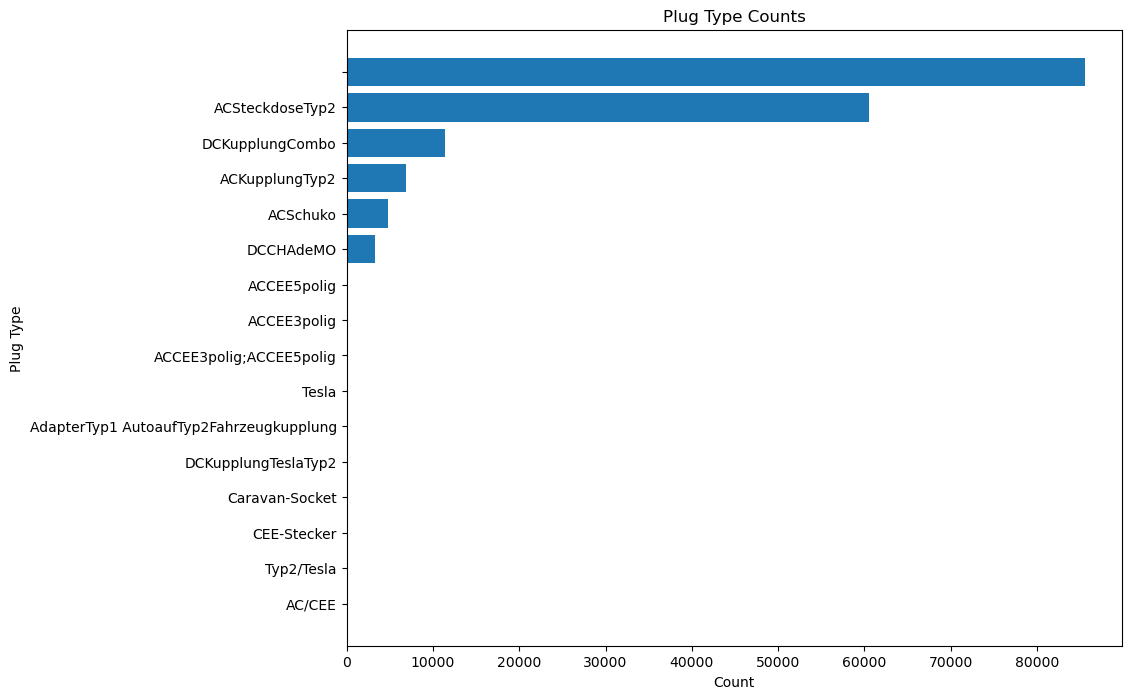

In [27]:
# Create a bar chart of plug type counts
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(plug_type_counts.index, plug_type_counts.values, align='center')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Plug Type')
ax.set_title('Plug Type Counts')

plt.show()


In [28]:
df_charging_stations.shape

(40674, 22)

In [29]:
# Including an index
df_charging_stations.reset_index(inplace=True)

In [30]:
df_charging_stations.head(1)

,index,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"


In [31]:
# Renaming the index into cs_id to have a unique identifier
df_charging_stations.rename(columns={'index' : 'cs_id'}, inplace=True)
df_charging_stations.head(2)

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [32]:
df_charging_stations.columns

Index(['cs_id', 'operator', 'street', 'house_number', 'zip_code', 'city',
       'federal_state', 'county', 'latitude', 'longitude',
       'commissioning_date', 'connecting_power', 'charging_device_type',
       'numbers_charging_points', 'plug_types_1', 'p1_kw', 'plug_types_2',
       'p2_kw', 'plug_types_3', 'p3_kw', 'plug_types_4', 'p4_kw',
       'all_plug_types'],
      dtype='object')

In [37]:
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cs_id                    40674 non-null  int64         
 1   operator                 40674 non-null  object        
 2   street                   40674 non-null  object        
 3   house_number             40674 non-null  object        
 4   zip_code                 40674 non-null  int64         
 5   city                     40674 non-null  object        
 6   federal_state            40674 non-null  object        
 7   county                   40674 non-null  object        
 8   latitude                 40674 non-null  object        
 9   longitude                40674 non-null  object        
 10  commissioning_date       40674 non-null  datetime64[ns]
 11  connecting_power         40674 non-null  object        
 12  charging_device_type     40673 n

In [33]:
# Variable with all columns to change
cols_to_convert = ['latitude', 'longitude', 'connecting_power', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw']
# Replace commas with dots
for col in cols_to_convert:
    df_charging_stations[col] = df_charging_stations[col].str.replace(',', '.')

In [35]:
df_charging_stations.head(2)

,cs_id,operator,street,house_number,zip_code,city,federal_state,county,latitude,longitude,...,numbers_charging_points,plug_types_1,p1_kw,plug_types_2,p2_kw,plug_types_3,p3_kw,plug_types_4,p4_kw,all_plug_types
0,0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,2,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,"ACSteckdoseTyp2,ACSteckdoseTyp2,,"
1,1,smopi®,Albstraße,14,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,4,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,AC Steckdose Typ 2,22,"ACSteckdoseTyp2,ACSteckdoseTyp2,ACSteckdoseTyp..."


In [38]:
# Replace empty strings with NaN values
df_charging_stations[cols_to_convert] = df_charging_stations[cols_to_convert].replace('', np.nan)

In [39]:
# Convert data types from object to float for specific columns
df_charging_stations[cols_to_convert] = df_charging_stations[cols_to_convert].astype(float)

In [40]:
# Checking the new data types
df_charging_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cs_id                    40674 non-null  int64         
 1   operator                 40674 non-null  object        
 2   street                   40674 non-null  object        
 3   house_number             40674 non-null  object        
 4   zip_code                 40674 non-null  int64         
 5   city                     40674 non-null  object        
 6   federal_state            40674 non-null  object        
 7   county                   40674 non-null  object        
 8   latitude                 40674 non-null  float64       
 9   longitude                40674 non-null  float64       
 10  commissioning_date       40674 non-null  datetime64[ns]
 11  connecting_power         40674 non-null  float64       
 12  charging_device_type     40673 n

In [43]:
# Saving the df as a csv file in this Repo on GitHub 
df_charging_stations.to_csv('charging_stations_clean.csv', index=False)

In [ ]:
plt.figure(figsize= 7, 5)

In [ ]:
"""
df_2 = df_charging_stations.explode('plug_types_1')
unique = list(df_2['plug_types_1'].unique())
print(unique)
"""